# 배민스토어 데이터 분석
- 기준일시 : 8월 25일(금) 오후 4시
- 위치 : "강남역"
- 상세 : "지금 인기있는 상품" 189개 중 69개 수집

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

In [3]:
# 1. 배민스토어에서 직접 수집하여 가공한 데이터입니다. 
# 과일, 건강기능식품, 육류, 반찬/밀키트, 꽃, 장난감, 화장품, 과자, 음료, 케이크, 그릇, 전자기기, 반려동물용품
bms_rawdata = """
육류, 28800, 35, 20
육류, 19900, 29, 12
꽃, 50000, 24, 9
과일, 19500, 34, 
케이크, 23000, 26, 14
과자, 1700, 50, 
꽃, 10000, 35, 25
과자, 1700, 50, 
꽃, 80000, 28, 10
꽃, 85000, 33, 
육류, 11000, , 
전자기기, 168000, 180, 
음료, 3050, 50, 
꽃, 12000, 29, 
전자기기, 359000, 150, 15
그릇, 30000, 31, 13
반찬/밀키트, 13900, 34, 17
장난감, 13500, 28, 26
음료, 1900, 50, 
음료, 900, 50, 
육류, 26900, 34, 17
꽃, 20000, 30, 20
꽃, 70000, 68, 50
꽃, 150000, , 
꽃, 32900, 40, 30
꽃, 29900, 40, 30
기타, 900, 50, 
꽃, 25000, , 
반찬/밀키트, 3000, 39, 20
꽃, 20000, 30, 15
그릇, 50000, 31, 13
음료, 2300, 50, 
케이크, 68000, 180, 
육류, 9700, 28, 13
화장품, 25000, 14, 5
반찬/밀키트, 4500, 28, 13
반찬/밀키트, 3200, 26, 
반찬/밀키트, 5950, 32, 
육류, 3300, 33, 20
꽃, 15000, 50, 30
꽃, 60000, 27, 10
음료, 2200, 45, 30
반려동물용품, 4500, 26, 11
꽃, 2900, 40, 30
과자, 1000, 40, 
전자기기, 189000, 150, 
화장품, 16000, 14, 5
건강기능식품, 29800, 30, 
기타, 1500, 40, 30
육류, 59800, 34, 14
과일, 2100, 50, 
육류, 27650, 34, 15
기타, 490, 40, 30
과자, 1700, 45, 30
반찬/밀키트, 3900, 24, 
건강기능식품, 75000, 40, 
반찬/밀키트, 3900, 23, 
전자기기, 72000, 150, 15
육류, 9200, 28, 13
위스키, 43000, , 20
꽃, 28000, 35, 25
꽃, 36000, 39, 20
반찬/밀키트, 11800, 22, 5
건강기능식품, 12750, 30, 
화장품, 70000, 14, 5
반려동물용품, 2400, 49, 30
꽃, 100000, 24, 9
장난감, 13500, 27, 16
반려동물용품, 168000, 40, 20
"""

In [4]:
# 2. 데이터를 데이터프레임으로 변환하기 위해, 엔터 값을 기준으로 나눈 리스트로 만들어줍니다.
bms_data = bms_rawdata.strip().split('\n')
bms_data

['육류, 28800, 35, 20',
 '육류, 19900, 29, 12',
 '꽃, 50000, 24, 9',
 '과일, 19500, 34, ',
 '케이크, 23000, 26, 14',
 '과자, 1700, 50, ',
 '꽃, 10000, 35, 25',
 '과자, 1700, 50, ',
 '꽃, 80000, 28, 10',
 '꽃, 85000, 33, ',
 '육류, 11000, , ',
 '전자기기, 168000, 180, ',
 '음료, 3050, 50, ',
 '꽃, 12000, 29, ',
 '전자기기, 359000, 150, 15',
 '그릇, 30000, 31, 13',
 '반찬/밀키트, 13900, 34, 17',
 '장난감, 13500, 28, 26',
 '음료, 1900, 50, ',
 '음료, 900, 50, ',
 '육류, 26900, 34, 17',
 '꽃, 20000, 30, 20',
 '꽃, 70000, 68, 50',
 '꽃, 150000, , ',
 '꽃, 32900, 40, 30',
 '꽃, 29900, 40, 30',
 '기타, 900, 50, ',
 '꽃, 25000, , ',
 '반찬/밀키트, 3000, 39, 20',
 '꽃, 20000, 30, 15',
 '그릇, 50000, 31, 13',
 '음료, 2300, 50, ',
 '케이크, 68000, 180, ',
 '육류, 9700, 28, 13',
 '화장품, 25000, 14, 5',
 '반찬/밀키트, 4500, 28, 13',
 '반찬/밀키트, 3200, 26, ',
 '반찬/밀키트, 5950, 32, ',
 '육류, 3300, 33, 20',
 '꽃, 15000, 50, 30',
 '꽃, 60000, 27, 10',
 '음료, 2200, 45, 30',
 '반려동물용품, 4500, 26, 11',
 '꽃, 2900, 40, 30',
 '과자, 1000, 40, ',
 '전자기기, 189000, 150, ',
 '화장품, 16000, 14, 5',
 '건강

In [5]:
# 3. 누락된 데이터가 존재하고, int값으로 정의해주어야 하는 데이터가 있으므로 아래 과정을 거쳐 리스트로 만들어줍니다.
# x가 숫자로만 이루어져 있다면 int(x)로 변환합니다.
# x가 숫자로 이루어져 있지 않다면 (x가 숫자가 아니라면) x를 그대로 유지합니다.
# 만약 x가 빈 문자열이라면 (x가 비어있다면) np.nan을 반환합니다.

bms_data_cleaned = [list(map(lambda x: int(x) if x.isdigit() 
                             else (x if x else np.nan), 
                             data.split(', '))) for data in bms_data]
bms_data_cleaned

[['육류', 28800, 35, 20],
 ['육류', 19900, 29, 12],
 ['꽃', 50000, 24, 9],
 ['과일', 19500, 34, nan],
 ['케이크', 23000, 26, 14],
 ['과자', 1700, 50, nan],
 ['꽃', 10000, 35, 25],
 ['과자', 1700, 50, nan],
 ['꽃', 80000, 28, 10],
 ['꽃', 85000, 33, nan],
 ['육류', 11000, nan, nan],
 ['전자기기', 168000, 180, nan],
 ['음료', 3050, 50, nan],
 ['꽃', 12000, 29, nan],
 ['전자기기', 359000, 150, 15],
 ['그릇', 30000, 31, 13],
 ['반찬/밀키트', 13900, 34, 17],
 ['장난감', 13500, 28, 26],
 ['음료', 1900, 50, nan],
 ['음료', 900, 50, nan],
 ['육류', 26900, 34, 17],
 ['꽃', 20000, 30, 20],
 ['꽃', 70000, 68, 50],
 ['꽃', 150000, nan, nan],
 ['꽃', 32900, 40, 30],
 ['꽃', 29900, 40, 30],
 ['기타', 900, 50, nan],
 ['꽃', 25000, nan, nan],
 ['반찬/밀키트', 3000, 39, 20],
 ['꽃', 20000, 30, 15],
 ['그릇', 50000, 31, 13],
 ['음료', 2300, 50, nan],
 ['케이크', 68000, 180, nan],
 ['육류', 9700, 28, 13],
 ['화장품', 25000, 14, 5],
 ['반찬/밀키트', 4500, 28, 13],
 ['반찬/밀키트', 3200, 26, nan],
 ['반찬/밀키트', 5950, 32, nan],
 ['육류', 3300, 33, 20],
 ['꽃', 15000, 50, 30],
 ['꽃', 60000, 27

In [6]:
# 4. 만들어 둔 리스트로 데이터프레임을 정의하였습니다. nan값이 있는 데이터의 경우 int로 정의할 수 없으므로, float로 정의해주었습니다.
# 10개의 샘플 데이터를 뽑아봅니다.
bms_df = pd.DataFrame(bms_data_cleaned, 
                      columns=["카테고리", "금액", "배달시간(mid)", "픽업시간(mid)"])
bms_df.sample(10)

,카테고리,금액,배달시간(mid),픽업시간(mid)
49,육류,59800,34.0,14.0
66,꽃,100000,24.0,9.0
59,위스키,43000,NaN,20.0
34,화장품,25000,14.0,5.0
31,음료,2300,50.0,NaN
40,꽃,60000,27.0,10.0
33,육류,9700,28.0,13.0
30,그릇,50000,31.0,13.0
61,꽃,36000,39.0,20.0
16,반찬/밀키트,13900,34.0,17.0


In [7]:
bms_df.카테고리.unique() 


array(['육류', '꽃', '과일', '케이크', '과자', '전자기기', '음료', '그릇', '반찬/밀키트', '장난감',
       '기타', '화장품', '반려동물용품', '건강기능식품', '위스키'], dtype=object)

In [8]:
# 5. 기본 정보를 출력하여 null 값 갯수와, 데이터 타입은 어떤지 확인해봅니다. 
# nan값이 있는 데이터의 경우, 데이터프레임으로 변환하는 과정에서 float로 정의되었습니다.
bms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   카테고리       69 non-null     object 
 1   금액         69 non-null     int64  
 2   배달시간(mid)  65 non-null     float64
 3   픽업시간(mid)  44 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


# Insight 1.
- "지금 인기있는 상품"의 픽업시간은 약 37%의 데이터가 유실되어있다는 사실을 기반으로,
- `픽업시간 혹은 픽업 여부는 배민스토어의 구매에 중요한 요인은 아닐 것`이라는 가설을 세워볼 수 있습니다.

===== 여기서부터 시각화로 넘어가는 부분이고 아직 작업 안 함, 내가 그리고 싶은 그래프=====  
6. 카테고리별 평균 금액에 대한 세로 막대 그래프  -> 전자기기는 평균 금액이 높음, 간식은 평균 금액이 낮음 이런 식으로 적어보고 원인 찾아보기.  
7. 카테고리별 count 그래프 : 누군가에게 줄 선물을 가장 많이 구매한다는 내용. 식재료도 많이 구매함.  
8. 카테고리별 배달시간과 픽업시간 그래프 -> 배달시간,픽업시간이 큰 영향을 안 미친다는 걸 보여주고 싶은데 괜찮을지?  
9. 그 외 재현의 아이디어  
10. 6번 7번을 하나에 묶어봐도 괜찮을 것 같음!!  

픽업시간에 대해..  
`픽업에 대한 수요가 엄연히 존재` 한다는 데이터 분석 결과가 존재하는 듯 하다.

In [9]:
# 한국어 표시 및 그래프 옵션 설정
sns.set_context("notebook", rc={"lines.linewidth": 1.5})
sns.set(color_codes=True)
sns.set_palette("pastel")

rc('font', family='malgun gothic')
# plt.rcParams['font.family']= 'malgun gothic'

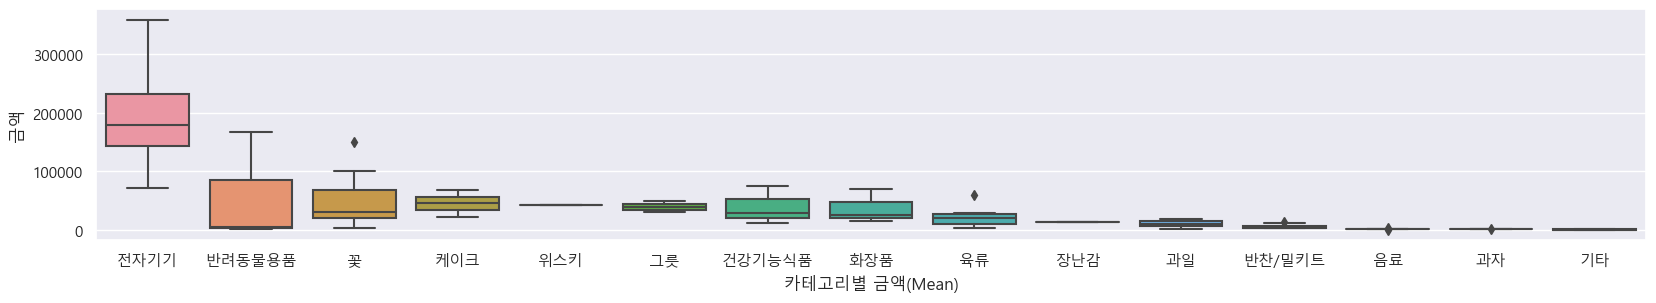

In [10]:
# 6. 카테고리별 평균 금액에 대한 boxplot으로 변경
# 6-1. 카테고리별 평균 금액 계산
category_avg_price = bms_df.groupby("카테고리")["금액"].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 3))
sns.boxplot(x = "카테고리", y = "금액", data = bms_df, order = category_avg_price.index)
plt.xlabel("카테고리별 금액(Mean)")
# plt.legend()
plt.show()

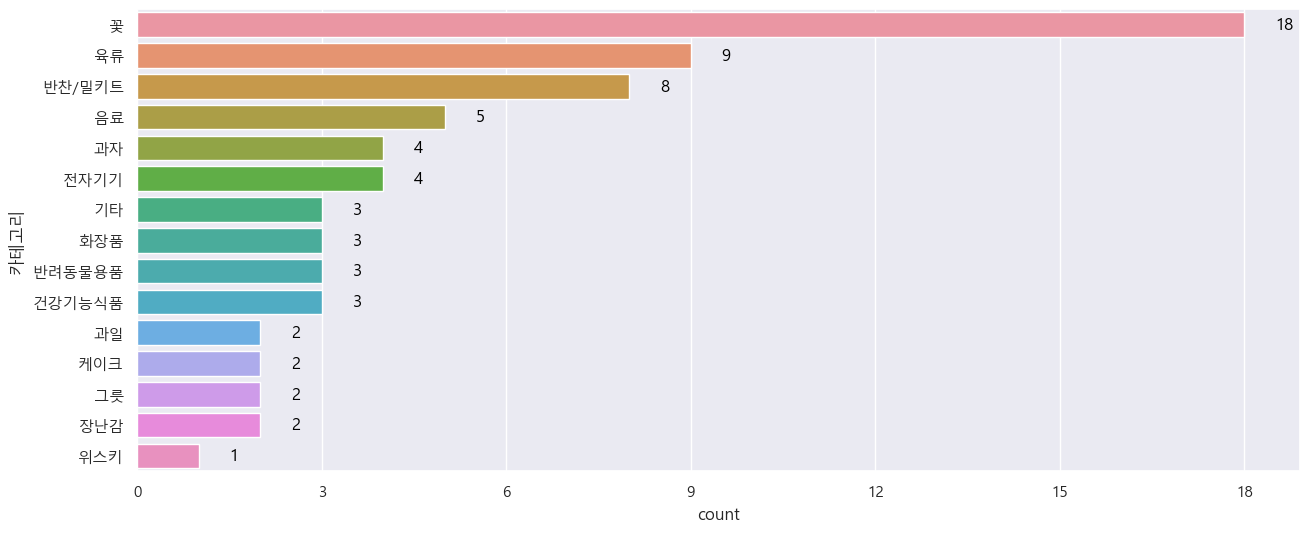

In [11]:
# 7. 카테고리별 unique 값에 대한 count값 
cat_count = bms_df['카테고리'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
sns.countplot(y="카테고리", data=bms_df, order = cat_count.index)
plt.xticks(range(0, max(cat_count) + 1, 3))  # 정수값으로 3 간격으로 설정

# 막대 오른쪽 끝에 값을 표시하는 로직 추가
for i, v in enumerate(cat_count.values):
    plt.text(v+0.5, i, str(v), color='black', va='center')

# plt.legend()
plt.show()

In [12]:
# 8. 픽업 및 배달시간 별 상품 카테고리 분포 확인하기
# 배달시간이 픽업시간에 비해 소요시간 이 더 길다. 
# # 근처의 상점에서 픽업을 진행하기 때문에 평균적으로 소요시간이 더 짧음을 유츄해 볼 수 있다.
display(bms_df.describe())

,금액,배달시간(mid),픽업시간(mid)
count,69.000000,65.000000,44.000000
mean,36905.652174,44.753846,18.636364
std,57655.997583,35.821620,9.328852
min,490.000000,14.000000,5.000000
25%,3300.000000,28.000000,13.000000
50%,16000.000000,34.000000,16.500000
75%,43000.000000,45.000000,25.250000
max,359000.000000,180.000000,50.000000


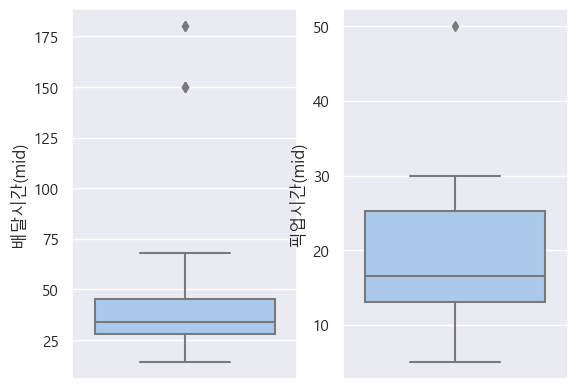

In [13]:
# 위의 내용을 boxplot으로 확인한 것
fig, ax = plt.subplots(nrows =1, ncols = 2)
sns.boxplot(y = "배달시간(mid)", data = bms_df, ax = ax[0])
sns.boxplot(y = '픽업시간(mid)', data =bms_df, ax = ax[1])
plt.show()

In [14]:
# 이상치또한 의미있는 데이터로 판단, 이상치의 그룹끼리 묶어서 판단해본다
# 보유데이터중 모든 전자기기의 배달시간이 매우 높음을 확인했다. 이유가 뭘까?(지도에 나름 있었던 것 같은데!)
bms_df2 = bms_df.copy()

q1_배달시간, q3_배달시간 = np.nanpercentile(bms_df2['배달시간(mid)'], [25, 75])
iqr_배달시간 = q3_배달시간 - q1_배달시간
max_배달시간 = q3_배달시간 + 1.5*iqr_배달시간

bms_df2.query(f'`배달시간(mid)` > {max_배달시간}')

,카테고리,금액,배달시간(mid),픽업시간(mid)
11,전자기기,168000,180.0,NaN
14,전자기기,359000,150.0,15.0
32,케이크,68000,180.0,NaN
45,전자기기,189000,150.0,NaN
57,전자기기,72000,150.0,15.0


In [15]:
# 픽업시간의 이상치는 꽃으로 확인되었다.
q1_픽업시간, q3_픽업시간 = np.nanpercentile(bms_df2['픽업시간(mid)'], [25, 75])
iqr_픽업시간 = q3_픽업시간 - q1_픽업시간
max_픽업시간 = q3_픽업시간 + 1.5*iqr_픽업시간

bms_df2.query(f'`픽업시간(mid)` > {max_픽업시간}')

,카테고리,금액,배달시간(mid),픽업시간(mid)
22,꽃,70000,68.0,50.0


In [16]:
# 픽업시간 max를 30분(이상치 제외)으로 가정했을 때 30분 이내의 경우 배달보다 픽업이 더 낫다고 볼 수 있지 않을까?(배달비)
# -> 귀찮, 선물, 장바구니로 한번에 등 
# 배달시간을 30분 이내, 30 ~ 1시간, 1시간 초과 이렇게 크게 3 카테고리로 분류하고 어떤 품목들이 분포해 있는지 보자

bms_df2['배달시간분류'] = 0

for i in range(len(bms_df2)):
    if bms_df2['배달시간(mid)'][i] <= 30:
        bms_df2.loc[i,'배달시간분류'] = '30분 이내'
        
    elif 30 < bms_df2['배달시간(mid)'][i] <= 60:
        bms_df2.loc[i,'배달시간분류'] = '30분 ~ 1시간'
    
    else:
        bms_df2.loc[i,'배달시간분류'] = '1시간 초과'
        
bms_df2

,카테고리,금액,배달시간(mid),픽업시간(mid),배달시간분류
0,육류,28800,35.0,20.0,30분 ~ 1시간
1,육류,19900,29.0,12.0,30분 이내
2,꽃,50000,24.0,9.0,30분 이내
3,과일,19500,34.0,NaN,30분 ~ 1시간
4,케이크,23000,26.0,14.0,30분 이내
...,...,...,...,...,...
64,화장품,70000,14.0,5.0,30분 이내
65,반려동물용품,2400,49.0,30.0,30분 ~ 1시간
66,꽃,100000,24.0,9.0,30분 이내
67,장난감,13500,27.0,16.0,30분 이내


In [17]:
# 배달시간이 null인 값을 일단 제거
bms_df2_nonnull = bms_df2.query('`배달시간(mid)` == `배달시간(mid)`')

In [18]:
bms_df2_nonnull.groupby('배달시간분류').describe().T
# 배달시간이 길 수록 픽업시간도 증가하는 경향..?? 
# 금액의 경우 30~1시간의 배달시간을 갖는 품목들이 평균적으로 제일 적었음(이상치 고려X)

배달시간분류                  1시간 초과      30분 ~ 1시간         30분 이내
금액        count       6.000000      35.000000      24.000000
          mean   154333.333333   22152.571429   25672.916667
          std    113684.944767   33544.269638   26495.179952
          min     68000.000000     490.000000    3200.000000
          25%     70500.000000    2000.000000    9575.000000
          50%    120000.000000    5950.000000   14750.000000
          75%    183750.000000   29350.000000   26200.000000
          max    359000.000000  168000.000000  100000.000000
배달시간(mid) count       6.000000      35.000000      24.000000
          mean      146.333333      40.628571      25.375000
          std        41.093390       6.856022       4.950296
          min        68.000000      31.000000      14.000000
          25%       150.000000      34.000000      24.000000
          50%       150.000000      40.000000      27.000000
          75%       172.500000      49.500000      28.250000
          max       180.000000      50.000000      30.000000
픽업시간(mid) count       3.000000      22.000000      18.000000
          mean       26.666667      23.136364      11.722222
          std        20.207259       6.584943       5.496582
          min        15.000000      13.000000       5.000000
          25%        15.000000      17.750000       9.000000
          50%        15.000000      22.500000      11.500000
          75%        32.500000      30.000000      13.750000
          max        50.000000      30.000000      26.000000

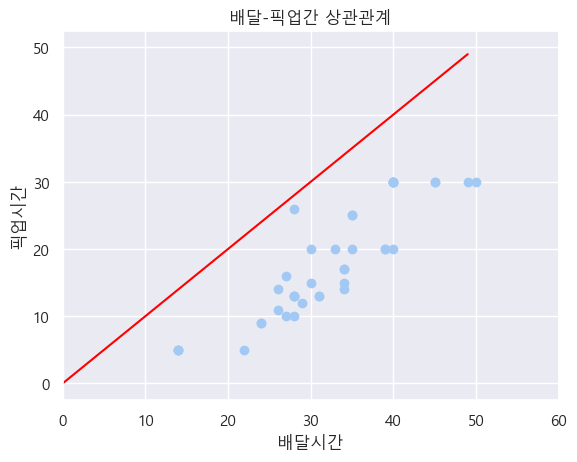

In [24]:
# 배달시간의 이상치를 제외하고서 보면 양의 상관관계가 있음을 짐작할 수 있음
plt.scatter(bms_df2_nonnull['배달시간(mid)'], bms_df2_nonnull['픽업시간(mid)'])
plt.plot(range(0, 50), range(0, 50), color = 'red')
plt.xlabel('배달시간')
plt.ylabel('픽업시간')
plt.xlim([0, 60])
plt.title('배달-픽업간 상관관계')
plt.show()

Text(0.5, 1.0, '1시간 초과')

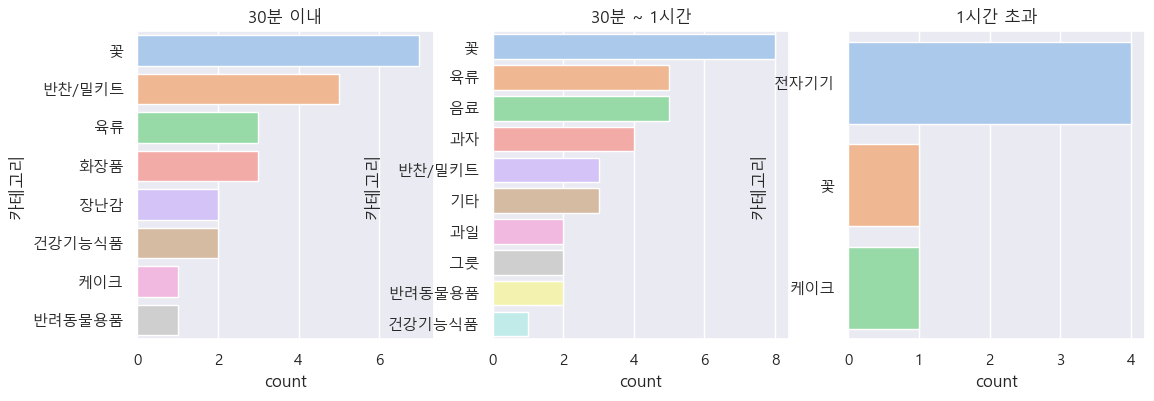

In [49]:
cat_count1 = bms_df2_nonnull.query('`배달시간분류` == "30분 이내"')['카테고리'].value_counts().sort_values(ascending=False)
cat_count2 = bms_df2_nonnull.query('`배달시간분류` == "30분 ~ 1시간"')['카테고리'].value_counts().sort_values(ascending=False)
cat_count3 = bms_df2_nonnull.query('`배달시간분류` == "1시간 초과"')['카테고리'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (13, 4), nrows = 1, ncols = 3)

sns.countplot(y = '카테고리', data = bms_df2_nonnull.query('`배달시간분류` == "30분 이내"'), order = cat_count1.index, ax = ax[0])
sns.countplot(y = '카테고리', data = bms_df2_nonnull.query('`배달시간분류` == "30분 ~ 1시간"'), order = cat_count2.index, ax = ax[1])
sns.countplot(y = '카테고리', data = bms_df2_nonnull.query('`배달시간분류` == "1시간 초과"'), order = cat_count3.index, ax = ax[2])

ax[0].set_title('30분 이내')
ax[1].set_title('30분 ~ 1시간')
ax[2].set_title('1시간 초과')

In [52]:
# 배달시간,픽업시간이 큰 영향을 안 미친다는 걸 보여주고 싶은데
# 1시간 이내에서는 꽃, 육류, 반찬, 건강기능식품, 반려동물용품 카테고리는 특정 배달 시간에 따라 더 구매가 있다고 보기는 어려워보임
# 화장품, 장난감은 30분 이내, 과일, 그릇, 기타는 30분 ~ 1시간 에만 존재함 -> 무슨의미???
# 확실한 것은 전자기기는 모두 1시간을 초과하여 있다는 것!


# 배달시간이 구매에 큰 영향을 미치는가?? -> 글쎄? 전체 빈도는 30~1시간 그룹이 제일 많지만 품목별로 봤을 때 두 30분이내, 30~1시간 그룹이 비슷함
# -> 두 그룹이 비슷한 이유는 각 품목들이 강남구 곳곳에서 판매되고 있는 것들이기 때문
# 특정 배달시간대에만 등장하는 카테고리가 있는가? -> 있기는 하다 단, 모든 데이터가 고려되지 않았다는 점에 있어서 애매


In [ ]:
# 선물은 회사에 받는사람의 주소 데이터가 있을 것임. 그 여부를 확인하면 선물인지 아닌지 나오니까!
# 거기서 제일 많이 나온 친구 = 수요가 가장 높다 = 8월 25일 금요일 오후 4시, 강남역에서 가장 인기가 많은 상품 카테고리는 " 꽃"
# 그 외에도 많이 나온 상품들을 보면, 꽃처럼 누군가에게 선물을 하려는 상품들이 많아보인다. : 저 카테고리 기반으로 나온 결과를 따라서 이게 선물용인지 아닌지 대략적으로 판단 가능
# 이게 시간적인 특성(오후4시)인지, 요일적인 특성(주말)인지, 시기적(8월, 여름이라서인지), 월말이라서인지, 위치(강남역)때문인지는 추가적인 데이터를 더 분석해보아야 한다.
# 입사해서 이런거 하고싶어요~ 하고 마무리하기.